# Neural network for regression with Tensorflow in python

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

Activation functions: sigmoid (logistic), relu, tanh (said to be a scaled sigmoid type function), threshold

Sigmoid refers to S-shaped.

In most cases, it has been found that the exact shape of the function
has little effect on the ultimate power of the network, though it can
have a significant impact on training speed. It must be kept in mind that sigmoid functions never reach
their theoretical minimum or maximum. For example, neurons that
use the logistic function should be considered fully activated at aroimd
0.9, and turned off at about 0.1 or so. It is certainly reasonable to use
the extremes of 0.0 and 1.0 as inputs to a network. It is futile, though,
to attempt to train a network to achieve extreme values as its output. \cite{Masters1999}

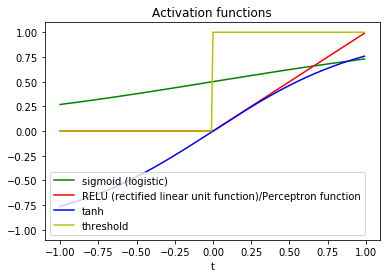

In [2]:
def sigmoid(t):
    '''logistic/sigmoid function'''
    return [1 / (1 + math.exp(-t1)) for t1 in t]    #10 is activation rate
def relu(t):  #the most popular
    '''rectified linear unit function'''
    return [t1 if t1>0 else 0 for t1 in t]
    
def threshold(t):
    '''threshold function'''
    return [1 if t1>0 else 0 for t1 in t]

t = np.arange(-1,1,0.01).tolist()
plt.plot(t, sigmoid(t), 'g-', label='sigmoid (logistic)') 
plt.plot(t, relu(t), 'r-', label='RELU (rectified linear unit function)/Perceptron function')
plt.plot(t, np.tanh(t), 'b-', label='tanh')
plt.plot(t, threshold(t), 'y-', label='threshold')
plt.legend()
plt.xlabel('t')
plt.ylim([-1.1, 1.1])
plt.title('Activation functions')
plt.show()

In [3]:
#softmax for classification
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
def softmax(v):
    v_exp = [math.exp(i) for i in v]
    return [math.exp(i) / sum(v_exp) for i in v]
print(softmax(z))

[0.023640543021591385, 0.06426165851049616, 0.17468129859572226, 0.4748329997443803, 0.023640543021591385, 0.06426165851049616, 0.17468129859572226]


In [4]:
df = pd.read_table('data/sensitivity_met_data.txt', sep=' ')
df.columns

Index(['X', 'date', 'Rl_downwell', 'AT_mbar', 'Rs_downwell', 'rH', 'T_b_1477',
       'D_g_1477', 'F_1_s_g_1477', 'Rnet'],
      dtype='object')

In [5]:
df.head()

,X,date,Rl_downwell,AT_mbar,Rs_downwell,rH,T_b_1477,D_g_1477,F_1_s_g_1477,Rnet
0,14755,2017-08-03 00:00:00,324.126342,872.825505,-5.598344,81.314077,5.567235,111.774365,1.731078,-15.434300
1,14756,2017-08-03 00:30:00,326.260588,872.751661,-5.280981,81.292929,5.617802,115.684001,0.945166,-14.885011
2,14757,2017-08-03 01:00:00,328.126291,872.777577,-5.024196,81.948296,5.574907,132.164967,0.955019,-13.216545
3,14758,2017-08-03 01:30:00,329.331054,872.647744,-5.299757,82.240550,5.694478,125.869389,1.473831,-11.503595
4,14759,2017-08-03 02:00:00,326.201118,872.422133,-5.781706,80.608641,5.774785,111.553343,1.927735,-14.075733


In [6]:
df1 = df.iloc[:, list(range(2,10))]
df1cl = df1.dropna(axis=0) #cleaning from NA

In [7]:
target = df1cl.iloc[:,[-1]]
X = df1cl.iloc[:,list(range(7))]

X_train, X_test, y_train, y_test =train_test_split(X, target, test_size=0.2)

In [8]:
#Normalising data between 0 and 1:
def scale01(X1): 
    '''scaling between 0 and 1 the columns of a pandas.dataframe'''
    return (X1-X1.min(axis=0))/(X1.max(axis=0)-X1.min(axis=0))
X_train_norm01 = scale01(X_train)
X_test_norm01 = scale01(X_test)
y_train_norm01 = scale01(y_train)
y_test_norm01 = scale01(y_test)

In [9]:
print(X_train.shape)
X_train_norm01.head()

(1420, 7)


,Rl_downwell,AT_mbar,Rs_downwell,rH,T_b_1477,D_g_1477,F_1_s_g_1477
910,0.252519,0.921285,0.002382,0.621650,0.490676,0.797413,0.246357
1342,0.732920,0.621991,0.005665,0.784252,0.416475,0.865861,0.223859
516,0.555941,0.763698,0.119106,0.782712,0.321399,0.843977,0.559338
990,0.305268,0.855413,0.527779,0.381813,0.814598,0.835760,0.324225
320,0.869866,0.745791,0.118835,0.732315,0.722988,0.451642,0.121432


#### for classification:

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units = 128,activation='relu', input_dim=X.shape[1]))

#model.add(tf.keras.layers.Dropout(rate = 0.3))
#model.add(tf.keras.layers.Dense(units = 64, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate = 0.3))
#model.add(tf.keras.layers.Dense(units = 32, activation='relu'))

model.add(tf.keras.layers.Dropout(rate = 0.3))
model.add(tf.keras.layers.Dense(units = target.shape[1]))

#to avoid overfitting, use drop-out (pick a neuron and set it to zero)
#adding a layer Dropout
#Last layer has no activation, it will be a linear layer.

In [10]:
X.shape[1]

7

In [11]:
def build_model():
    modeln = tf.keras.Sequential()
    modeln.add(tf.keras.layers.Dense(units =4,activation='sigmoid', input_dim=X.shape[1])) #units=128
    #modeln.add(tf.keras.layers.Dropout(rate = 0.3))
    #modeln.add(tf.keras.layers.Dense(units = 64, activation='relu'))
    #modeln.add(tf.keras.layers.Dropout(rate = 0.3))
    #modeln.add(tf.keras.layers.Dense(units = 32, activation='relu'))
    modeln.add(tf.keras.layers.Dropout(rate = 0.3))
    modeln.add(tf.keras.layers.Dense(units = target.shape[1], activation='sigmoid'))
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    modeln.compile(optimizer= optimizer, loss= 'mse',metrics=['mae'])
    return modeln
# to avoid overfitting, use drop-out (pick a neuron and set it to zero)

modeln1 = build_model()


*loss* is "binary_crossentropy", "categorical_crossentropy", "sparse_categorical_crossentropy", "mse"

*Crossentropy* is a quantity forom the field of Information Theory that measures the distance between probability distributions and your predictions.
 
 *binary_crossentropy* loss if you are facing a binary classification (two output classes) problem and the output of your network is a probability (you end your network with a single-unit layer with a *sigmoid* activation. The output of your network should be a scalar between 0 and 1, encoding a probability.
 
 *categorical_crossentropy* expects the label to follow a categorical encoding.
 
 *sparse_categorical_crossentropy* is used with integer labels. It is still matematically the same loss function as *categorical_crossentropy*.
 
 *mse* stands for *mean squared error*, the square ofthe difference between the predictions and the targets. This is widely used for *regression* problems.
 
*optimizer*: "rmsprop", "adam", 

how many times you want it to learn from the data: *epochs*

*batch_size*: how many examples 

### Classification 
If you are classifying data points among $N$ classes, your network should end with a dense layer of size $N$.
In a single-label, multiclass classification problem, your network should end with a *softmax* activation so that it will output a probability distribution over the $N$ output classes.
*Categorical crossentropy* is almost always the loss function you should use for such problems. It minimises the distance between the probability distribution output by the network and the true distribution of the targets.
There are two ways to handle labels in multiclass classification:
- Encoding the labels via categorical encoding (also known as one-hot encoding) and using *categorical_crossentropy* as a loss function.
- Encoding the labels as integers and using the sparse_categorical_crossentropy loss function.

If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.

Metrics to use: *'accuracy'*.

### Regression
If you want to predict a continuous value instead of a discrete label, then the problem is *regression*.
A new metric during training is *mae*, which stands for *mean absolute error* and is the absolute value of the difference between the predictions and the targets.
The concept of *accuracy* does not apply for regression. A common regression metric is *mean absolute error* ('mae').

Regression uses different loss functions and different evaluation metrics than classification.
*Mean squared error* (MSE) is loss function commonly used for regression.


*optimizer* : 'sdg', 'rmsprop'

'sdg' stands for Stochastic Gradient Descent and it an optimizer function which is suitable for linear regression tasks like in our case.

## Last layer
| Problem type                            | Last-layer activation | Loss function |
| :-------------------------------------- |:---------------------:| -----:|
| Binary classification                   | *sigmoid*             | *binary_crossentropy*      |
| Multiclass, single-label classification | *softmax*             | *categorical_crossentropy* |
| Multiclass, multilabel classification   | *sigmoid*             | *binary_crossentropy*      |
| Regression to arbitrary values          | None                  | *mse*                      |
| Regression to values between 0 and 1    | *sigmoid*             | *mse* or *binary_crossentropy* |

'softmax' function which skizzes everything between 0 and 1

In the regression problem the network ends with a single unit and no activation.

## Add dropout
- to avoid overfitting, use drop-out (pick a neuron and set it to zero)

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector $[0.2, 0.5, 1.3, 0.8, 1.1]$ for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. $[0, 0.5, 1.3, 0, 1.1]$. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between $0.2$ and $0.5$. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

## fit
*epochs*: how many times you want it to learn from the data

*batch_size*: the number of samples per batch, how many examples 
A small set of samples (typically between 8 and 128) that are processed simultaneously by the model. The number of samples is often a power of 2, to facilitate memory allocation on GPU. When training, a mini-batch is used to compute a single gradient-descent update applied to the weights of the model.

*verbose = 0* trains the model in silent mode.

In [14]:
print(modeln1.summary())
# Display training progress by printing a single dot for each completed epoch
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 20


history = modeln1.fit(X_train_norm01, y_train_norm01,epochs=EPOCHS,batch_size=1,
          validation_data=[X_test_norm01,y_test_norm01], verbose=0,callbacks=[PrintDot()])

[loss, mae] = modeln1.evaluate(X_test_norm01, y_test_norm01, verbose=0)
print('loss: ',loss,'\n mae: ', mae)
#modeln1.save('modeln.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 32        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None

....................loss:  0.0043738846850751995 
 mae:  0.0359973582163663


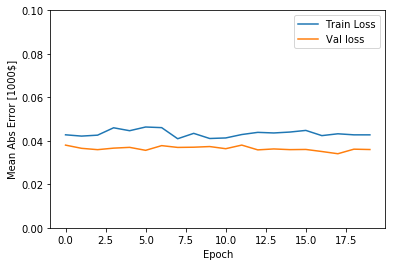

In [15]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 0.1])

plot_history(history)


....................

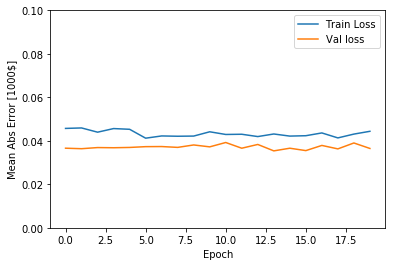

In [16]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = modeln1.fit(X_train_norm01, y_train_norm01,epochs=EPOCHS,batch_size=1,
          validation_data=[X_test_norm01,y_test_norm01], verbose=0,
                      callbacks=[early_stop, PrintDot()])

plot_history(history)

In [17]:
[loss, mae] = modeln1.evaluate(X_test_norm01, y_test_norm01, verbose=0)
print(loss)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

0.004749465563242704
Testing set Mean Abs Error: $  36.49


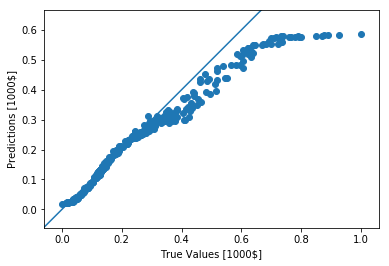

In [18]:
#Predicting
test_predictions = modeln1.predict(X_test_norm01).flatten()

plt.scatter(y_test_norm01, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

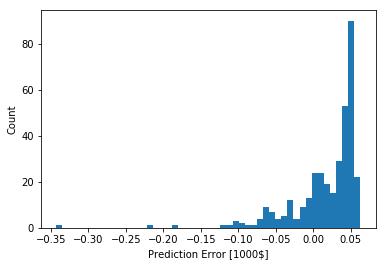

In [18]:
error = test_predictions - y_test_norm01['Rnet']
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")



## Summary

When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.



When little training data is available, it's preferable to use a small network with few hidden layers (typically only one or two), in order to avoid overfitting.

When input data features have values with different ranges, each feature should be scaled independently.

Early stopping is a useful technique to prevent overfitting.

<!--bibtex
@BOOK{HastieTrevor2009TEoS,
  series = {Springer Series in Statistics},
  publisher = {Springer New York},
  isbn = {9780387848570},
  year = {2009},
  title = {The Elements of Statistical Learning: Data Mining, Inference, and Prediction},
  edition = {Second Edition},
  language = {eng},
  address = {New York, NY},
  doi = {10.1007/978-0-387-84858-7},
  author = {Hastie, Trevor and Tibshirani, Robert and Friedman, Jerome},
  keywords = {Computer Science ; Artificial Intelligence (Incl. Robotics) ; Data Mining and Knowledge Discovery ; Probability Theory     and Stochastic Processes ; Statistical Theory and Methods ; Computational Biology/Bioinformatics ; Computer Appl. in Life Sciences ; Computer Science ; Mathematics},
}

@BOOK{Masters1993,
  author = {Timothy Masters},
  title = {Practical Neural Networks Recipes in C++},
  year = {1993},
  publisher = {Academic Press, Inc.}
}

@BOOK{Geron2017,
  title = {Hands-on Machine Learning with Scikit-Learn \& Tensorflow},
  author = {Aurelien Geron},
  year = {2017},
  publisher = {O'Reilly Media}
}

-->

# References

<mark> <b>The bib file ana.bib was not found

</b> </mark>(<a id="cit-Masters1999" href="#call-Masters1999">?</a>) !! _This reference was not found in ana.bib _ !!

